In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import timeit
import scipy.fftpack
import scipy.io as sio
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D
from scipy import signal
from scipy import interpolate
from PIL import Image


---
# VIDEO: Image smoothing and sharpening
---


In [5]:
# load image and convert to float
lenna = np.asarray( Image.open("Lenna.png") )
print(lenna)
imgL  = np.mean(lenna,axis=2)
print(imgL)

[[[226 137 125]
  [226 137 125]
  [223 137 133]
  ...
  [230 148 122]
  [221 130 110]
  [200  99  90]]

 [[226 137 125]
  [226 137 125]
  [223 137 133]
  ...
  [230 148 122]
  [221 130 110]
  [200  99  90]]

 [[226 137 125]
  [226 137 125]
  [223 137 133]
  ...
  [230 148 122]
  [221 130 110]
  [200  99  90]]

 ...

 [[ 84  18  60]
  [ 84  18  60]
  [ 92  27  58]
  ...
  [173  73  84]
  [172  68  76]
  [177  62  79]]

 [[ 82  22  57]
  [ 82  22  57]
  [ 96  32  62]
  ...
  [179  70  79]
  [181  71  81]
  [185  74  81]]

 [[ 82  22  57]
  [ 82  22  57]
  [ 96  32  62]
  ...
  [179  70  79]
  [181  71  81]
  [185  74  81]]]
[[162.66666667 162.66666667 164.33333333 ... 166.66666667 153.66666667
  129.66666667]
 [162.66666667 162.66666667 164.33333333 ... 166.66666667 153.66666667
  129.66666667]
 [162.66666667 162.66666667 164.33333333 ... 166.66666667 153.66666667
  129.66666667]
 ...
 [ 54.          54.          59.         ... 110.         105.33333333
  106.        ]
 [ 53.66666667  5

Text(0.5,1,'Original image')

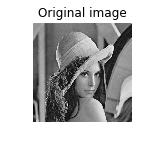

In [6]:
# plot original image
plt.subplot2grid((2,2),(0,0))
plt.imshow(imgL,cmap=plt.cm.gray)
plt.axis('off')
plt.title('Original image')

In [8]:
# and its power spectrum
imgX  = scipy.fftpack.fftshift(scipy.fftpack.fft2(imgL))
print(imgX)
print("----------------------")
powr2 = np.log(np.abs(imgX))
print(powr2)

[[  398.66666667   +0.        j  -287.72647503-1990.99010026j
   -192.10176417 +377.61010561j ...   -27.22002507 +808.96468786j
   -192.10176417 -377.61010561j  -287.72647503+1990.99010026j]
 [  228.67096673-1408.76536137j  -986.1658783  +323.93394537j
    315.63752333 +492.6229421 j ...  -598.85609847  +71.05764245j
    485.98614374 -400.76341859j  -393.02149729 +722.8101574 j]
 [ -204.97761995 +806.68064526j  -126.86841681 +264.393972  j
   -191.44372717 -854.76883622j ... -1309.38572251 +349.84288047j
   -871.51069057 -467.74758662j   158.98461284 -161.78960273j]
 ...
 [ -250.43947823 -310.13765681j   481.50264079-1358.1122705 j
    308.48949566 -363.83094596j ...  -391.01056995+1235.55595586j
    -11.6497478  -698.60680369j   -33.55318716  +30.98416251j]
 [ -204.97761995 -806.68064526j   158.98461284 +161.78960273j
   -871.51069057 +467.74758662j ...   724.72017818 +595.13253181j
   -191.44372717 +854.76883622j  -126.86841681 -264.393972  j]
 [  228.67096673+1408.76536137j  -393.02

Text(0.5,1,'Amplitude spectrum')

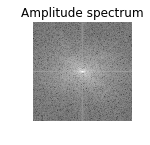

In [9]:
plt.subplot2grid((2,3),(1,0))
plt.imshow(powr2,cmap=plt.cm.gray)
plt.clim([0,15])
plt.axis('off')
plt.title('Amplitude spectrum')



In [14]:

# filter kernel is a Gaussian
width = .1 # width of gaussian (normalized Z units)
lims  = np.shape(imgL)
print(lims)
xr    = stats.zscore(np.arange(lims[0]))
#print(xr)
[x,y] = np.meshgrid(xr,xr)
x
y
# add 1- at beginning of the next line to invert the filter
gaus2d = 1-np.exp( -( x**2 + y**2 ) / (2*width**2) )
xgaus2d = np.exp( -( x**2 + y**2 ) / (2*width**2) )
gaus2d.shape

(512, 512)


(512, 512)

In [16]:
xgaus2d

array([[1.65806744e-130, 5.32788606e-130, 1.70419629e-129, ...,
        1.70419629e-129, 5.32788606e-130, 1.65806744e-130],
       [5.32788606e-130, 1.71201540e-129, 5.47611240e-129, ...,
        5.47611240e-129, 1.71201540e-129, 5.32788606e-130],
       [1.70419629e-129, 5.47611240e-129, 1.75160849e-128, ...,
        1.75160849e-128, 5.47611240e-129, 1.70419629e-129],
       ...,
       [1.70419629e-129, 5.47611240e-129, 1.75160849e-128, ...,
        1.75160849e-128, 5.47611240e-129, 1.70419629e-129],
       [5.32788606e-130, 1.71201540e-129, 5.47611240e-129, ...,
        5.47611240e-129, 1.71201540e-129, 5.32788606e-130],
       [1.65806744e-130, 5.32788606e-130, 1.70419629e-129, ...,
        1.70419629e-129, 5.32788606e-130, 1.65806744e-130]])

Text(0.5,1,'Gain function')

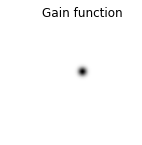

In [17]:


# show Gaussian
plt.subplot2grid((2,3),(1,1))
plt.imshow(gaus2d,cmap=plt.cm.gray)
plt.axis('off')
plt.title('Gain function')



Text(0.5,1,'Gain function')

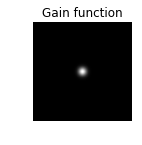

In [18]:


# show Gaussian
plt.subplot2grid((2,3),(1,1))
plt.imshow(xgaus2d,cmap=plt.cm.gray)
plt.axis('off')
plt.title('Gain function')

In [ ]:

# show modulated spectrum
plt.subplot2grid((2,3),(1,2))
plt.imshow( np.log(np.abs( np.multiply(imgX,gaus2d)) ) ,cmap=plt.cm.gray)
plt.axis('off')
plt.clim([0,15])
plt.title('Modulated spectrum')

